# MLP
Mean RCI over 14 cell lines.

This notebook uses
mRNA, canonical, no middle-exclusion train, no middle-exclusion test, 0 threshold, learning module, cross-validation.



In [1]:
SEED = 45
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 20:02:17.134656


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0.model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'ZERO'   # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = 0  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -1   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         =  1   #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.pc_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.pc_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_pc_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_pc_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [1]  # H1.hESC   
print('Exclusions',EXCLUSIONS)

Exclusions [1]


In [6]:
from tensorflow import keras
from keras import models
import pickle

def save_model(model, discriminator, filename1, filename2):
    filepath = MODEL_DIR + filename1
    model.save(filepath)
    print('Saved model 1 to',filepath)
    filepath = MODEL_DIR + filename2
    pickle.dump(discriminator, open(filepath, 'wb'))
    print('Saved model 2 to',filepath)

def load_model(filename1, filename2):
    filepath = MODEL_DIR + filename1
    model = keras.models.load_model(filepath)
    print('Loaded model 1 from',filepath)
    filepath = MODEL_DIR + filename2
    discriminator = pickle.load(open(filepath, 'rb'))        
    print('Loaded model 2 from',filepath)
    return model, discriminator
        

2023-04-29 20:02:19.368391
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.pc_RCI.all_cell_lines.csv
Number of RCI values loaded 13663
Num RCI: 13663
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_pc_transcripts.csv
Loaded 13663 sequences.

Training # 1 1
2023-04-29 20:03:18.155047
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.1.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5766:5164 52.75%
Computed class weights: {0: 1.058288148721921, 1: 0.947797433229275}
Valid 1:0 1402:1331 51.30%
FIT


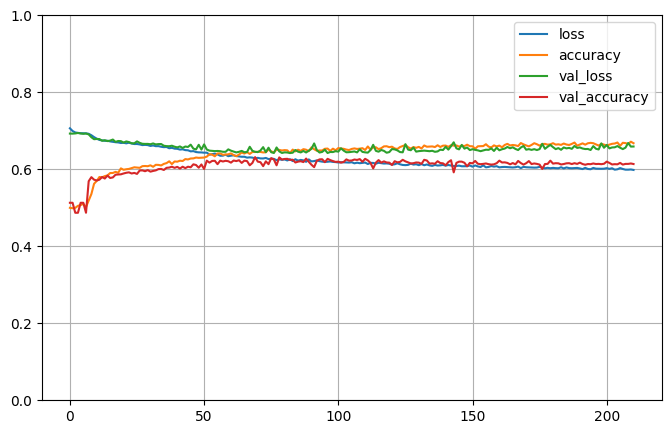


Testing # 1 1
2023-04-29 20:09:42.189254
PREDICT
Test 1:0 1402:1331 51.30%
Predict 1:0 1395:1338 51.04%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.516142 mean 0.17770839 std
Range of scores: 0.13407268 to 0.9760967
Score threshold 0.5
Confusion matrix
 [[825 506]
 [513 889]]
Normalized matrix
 [[0.30186608 0.18514453]
 [0.18770582 0.32528357]]
Extreme scores correct, pos:neg 475 381
Extreme scores incorrect pos:neg 188 179


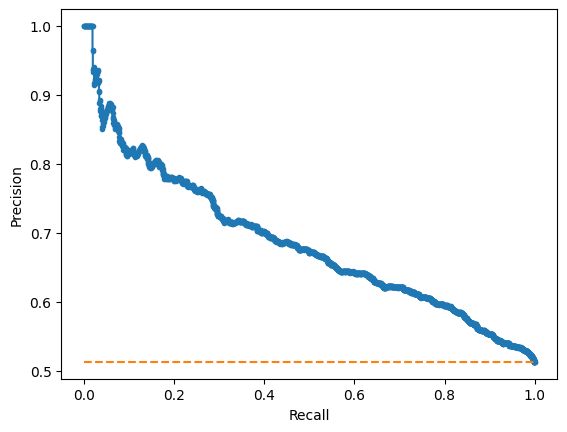

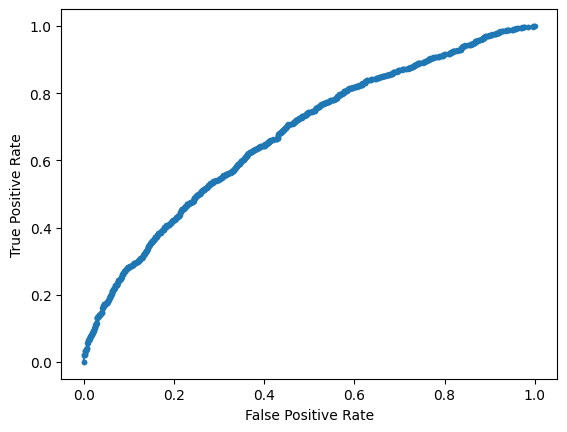

Accuracy: 62.71% Precision: 63.73% Recall: 63.41%
F1: 63.57% MCC: 0.2539
AUPRC: 68.60% AUROC: 67.52%
 accuracy [62.71496523966338]
 precision [63.72759856630824]
 recall [63.40941512125535]
 F1 [63.56810868787988]
 MCC [0.25389838610646515]
 AUPRC [68.60254100552064]
 AUROC [67.51892488030944]

Training # 1 2
2023-04-29 20:09:43.151329
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.2.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5693:5237 52.09%
Computed class weights: {0: 1.0435363757876648, 1: 0.9599508167925522}
Valid 1:0 1475:1258 53.97%
FIT


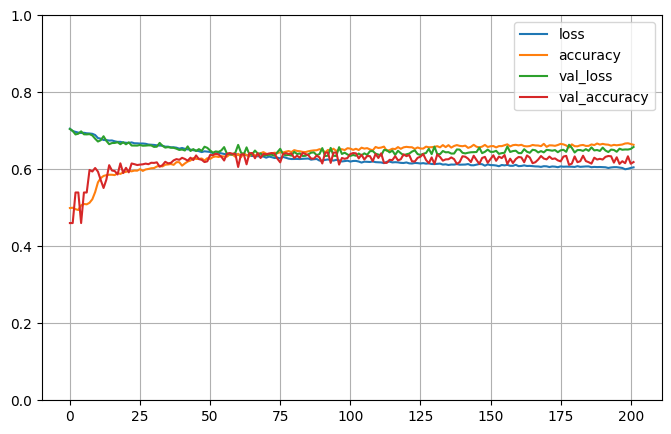


Testing # 1 2
2023-04-29 20:15:25.470213
PREDICT
Test 1:0 1475:1258 53.97%
Predict 1:0 1719:1014 62.90%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.5642122 mean 0.18284695 std
Range of scores: 0.1111984 to 0.9879692
Score threshold 0.5
Confusion matrix
 [[ 647  611]
 [ 367 1108]]
Normalized matrix
 [[0.23673619 0.22356385]
 [0.13428467 0.40541529]]
Extreme scores correct, pos:neg 684 277
Extreme scores incorrect pos:neg 269 120


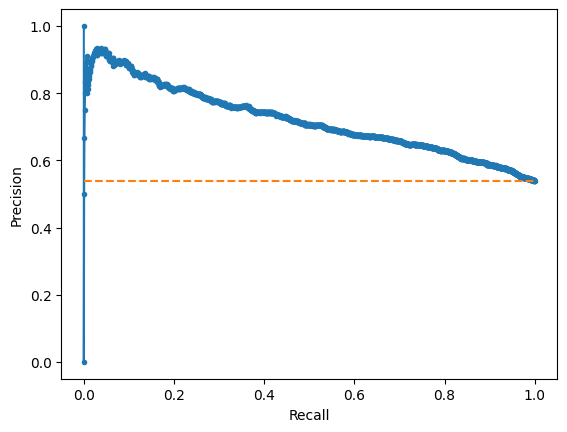

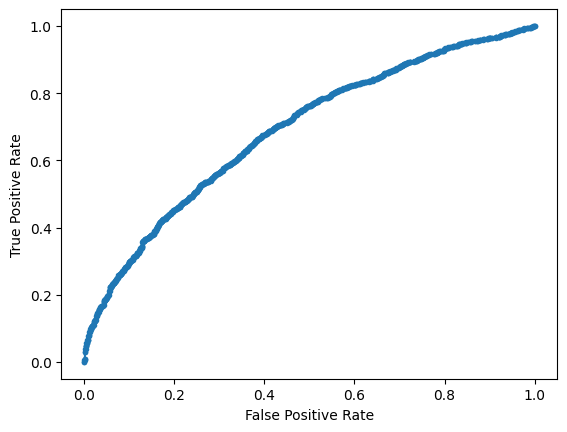

Accuracy: 64.22% Precision: 64.46% Recall: 75.12%
F1: 69.38% MCC: 0.2739
AUPRC: 71.85% AUROC: 68.84%
 accuracy [64.21514818880351]
 precision [64.45607911576498]
 recall [75.11864406779661]
 F1 [69.38008766437069]
 MCC [0.2739274429241644]
 AUPRC [71.84755312835543]
 AUROC [68.83603244321091]

Training # 1 3
2023-04-29 20:15:26.266823
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.3.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5720:5210 52.33%
Computed class weights: {0: 1.0489443378119, 1: 0.9554195804195804}
Valid 1:0 1448:1285 52.98%
FIT


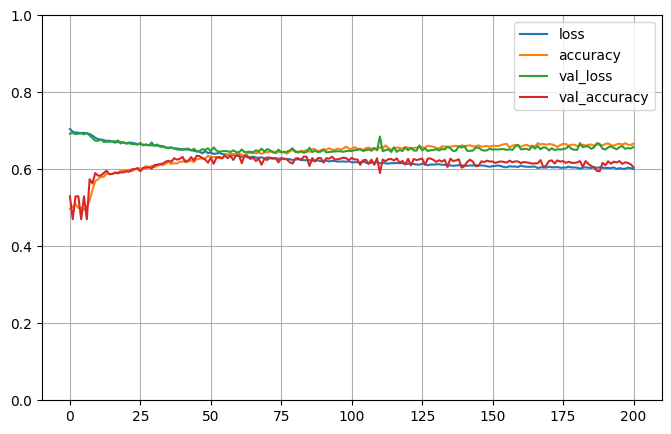


Testing # 1 3
2023-04-29 20:21:01.983769
PREDICT
Test 1:0 1448:1285 52.98%
Predict 1:0 1672:1061 61.18%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.55921185 mean 0.18014707 std
Range of scores: 0.13720499 to 0.98188806
Score threshold 0.5
Confusion matrix
 [[ 667  618]
 [ 394 1054]]
Normalized matrix
 [[0.24405415 0.22612514]
 [0.14416392 0.38565679]]
Extreme scores correct, pos:neg 633 271
Extreme scores incorrect pos:neg 264 125


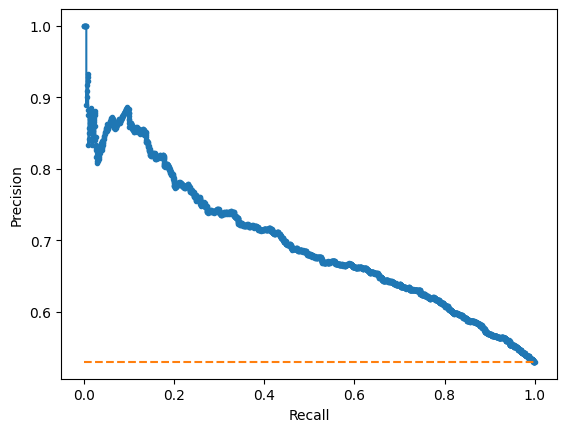

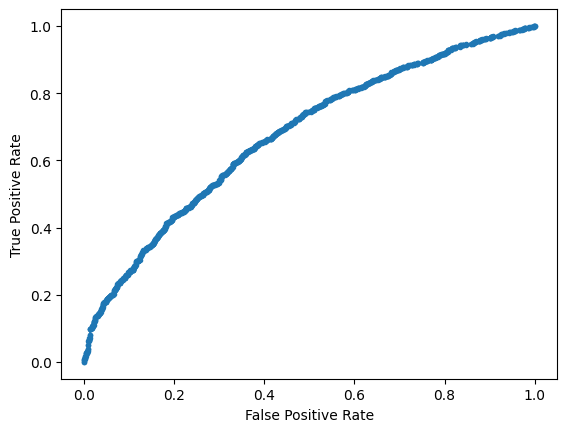

Accuracy: 62.97% Precision: 63.04% Recall: 72.79%
F1: 67.56% MCC: 0.2529
AUPRC: 69.69% AUROC: 67.49%
 accuracy [62.97109403585803]
 precision [63.038277511961724]
 recall [72.79005524861878]
 F1 [67.56410256410257]
 MCC [0.25292887687502347]
 AUPRC [69.68639232080191]
 AUROC [67.49408818281488]

Training # 1 4
2023-04-29 20:21:02.872454
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.4.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5770:5161 52.79%
Computed class weights: {0: 1.059000193760899, 1: 0.9472270363951473}
Valid 1:0 1398:1334 51.17%
FIT


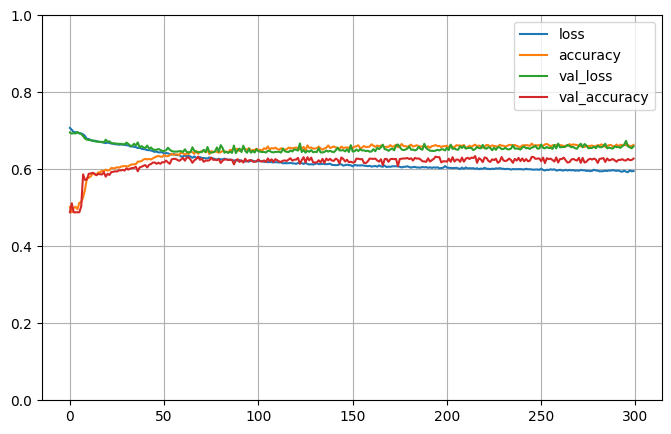


Testing # 1 4
2023-04-29 20:29:25.663815
PREDICT
Test 1:0 1398:1334 51.17%
Predict 1:0 1075:1657 39.35%
Test sizes (2732, 1025) (2732,)
Distrib of scores: 0.4773682 mean 0.20966634 std
Range of scores: 0.09029768 to 0.982459
Score threshold 0.5
Confusion matrix
 [[987 347]
 [670 728]]
Normalized matrix
 [[0.36127379 0.12701318]
 [0.24524158 0.26647145]]
Extreme scores correct, pos:neg 391 529
Extreme scores incorrect pos:neg 129 265


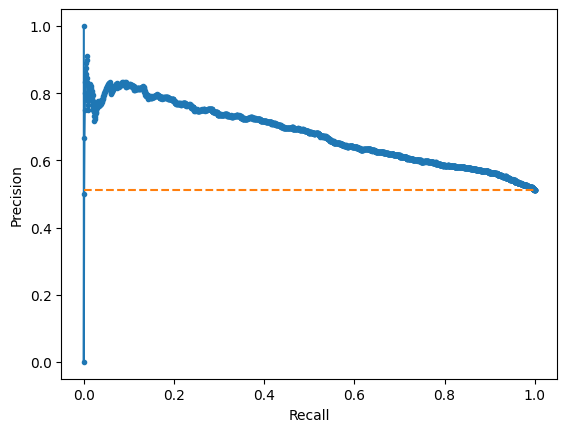

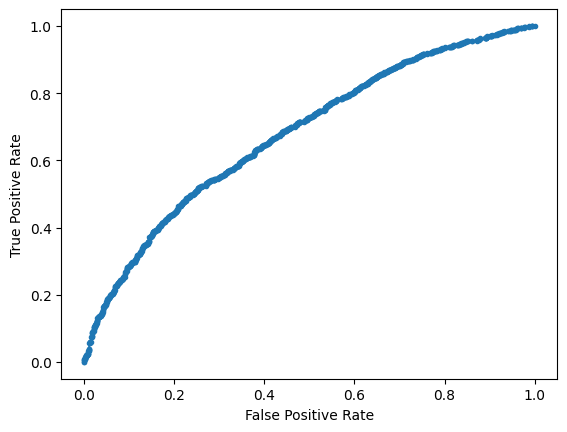

Accuracy: 62.77% Precision: 67.72% Recall: 52.07%
F1: 58.88% MCC: 0.2667
AUPRC: 67.83% AUROC: 67.85%
 accuracy [62.774524158125914]
 precision [67.72093023255815]
 recall [52.07439198855508]
 F1 [58.875859280226436]
 MCC [0.26667382275277307]
 AUPRC [67.82753817310171]
 AUROC [67.84952480841125]

Training # 1 5
2023-04-29 20:29:26.418573
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.1.5.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5723:5208 52.36%
Computed class weights: {0: 1.0494431643625193, 1: 0.9550061156735977}
Valid 1:0 1445:1287 52.89%
FIT


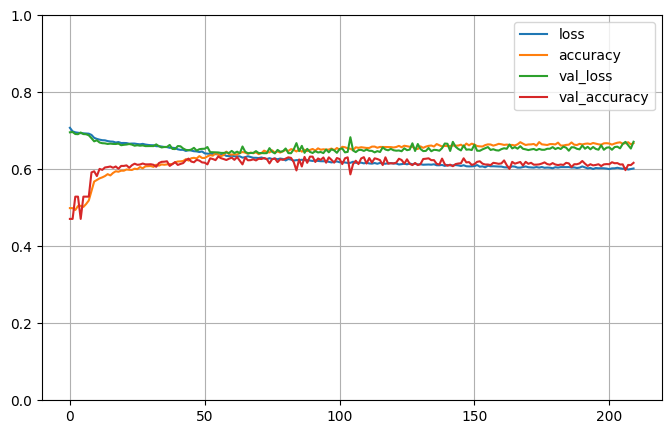


Testing # 1 5
2023-04-29 20:35:20.492233
PREDICT
Test 1:0 1445:1287 52.89%
Predict 1:0 1570:1162 57.47%
Test sizes (2732, 1025) (2732,)
Distrib of scores: 0.5374242 mean 0.19227871 std
Range of scores: 0.07252661 to 0.9611936
Score threshold 0.5
Confusion matrix
 [[ 721  566]
 [ 441 1004]]
Normalized matrix
 [[0.26390922 0.20717423]
 [0.1614202  0.36749634]]
Extreme scores correct, pos:neg 615 368
Extreme scores incorrect pos:neg 243 176


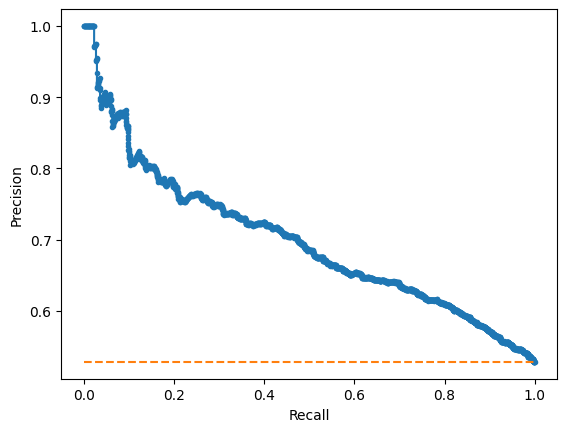

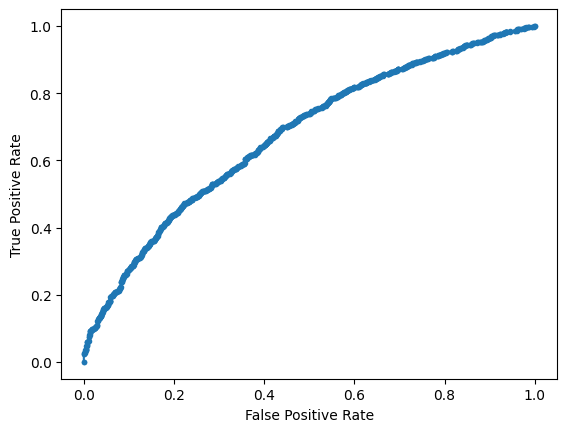

Accuracy: 63.14% Precision: 63.95% Recall: 69.48%
F1: 66.60% MCC: 0.2575
AUPRC: 69.84% AUROC: 67.45%
 accuracy [63.14055636896047]
 precision [63.94904458598726]
 recall [69.48096885813149]
 F1 [66.60033167495854]
 MCC [0.2574879399029265]
 AUPRC [69.8386850987733]
 AUROC [67.44912526919447]

Training # 2 1
2023-04-29 20:35:21.245698
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.1.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5739:5191 52.51%
Computed class weights: {0: 1.0527836640339048, 1: 0.9522564906778185}
Valid 1:0 1429:1304 52.29%
FIT


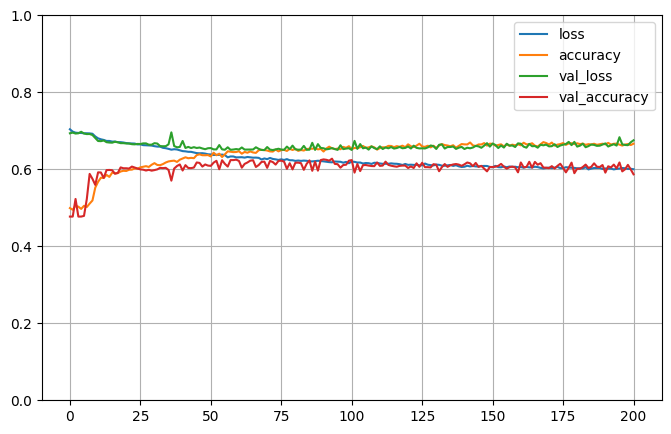


Testing # 2 1
2023-04-29 20:41:45.054089
PREDICT
Test 1:0 1429:1304 52.29%
Predict 1:0 1573:1160 57.56%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.53525746 mean 0.17019911 std
Range of scores: 0.1349053 to 0.9869052
Score threshold 0.5
Confusion matrix
 [[718 586]
 [442 987]]
Normalized matrix
 [[0.26271497 0.21441639]
 [0.16172704 0.3611416 ]]
Extreme scores correct, pos:neg 525 298
Extreme scores incorrect pos:neg 210 138


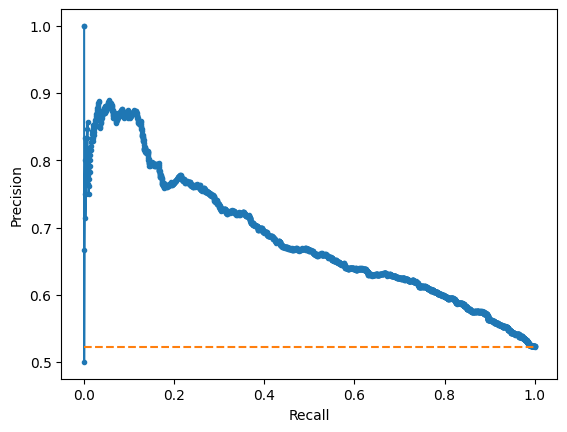

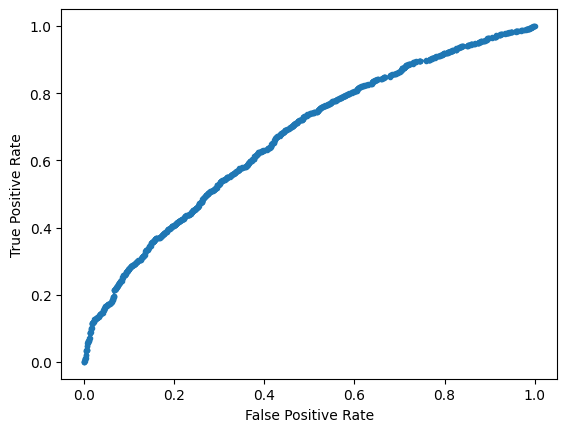

Accuracy: 62.39% Precision: 62.75% Recall: 69.07%
F1: 65.76% MCC: 0.2439
AUPRC: 68.37% AUROC: 66.69%
 accuracy [62.385656787413104]
 precision [62.74634456452638]
 recall [69.06927921623513]
 F1 [65.75616255829448]
 MCC [0.24385417478417806]
 AUPRC [68.36928687863326]
 AUROC [66.69213959738458]

Training # 2 2
2023-04-29 20:41:45.875399
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.2.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5748:5182 52.59%
Computed class weights: {0: 1.054612118873022, 1: 0.9507654836464857}
Valid 1:0 1420:1313 51.96%
FIT


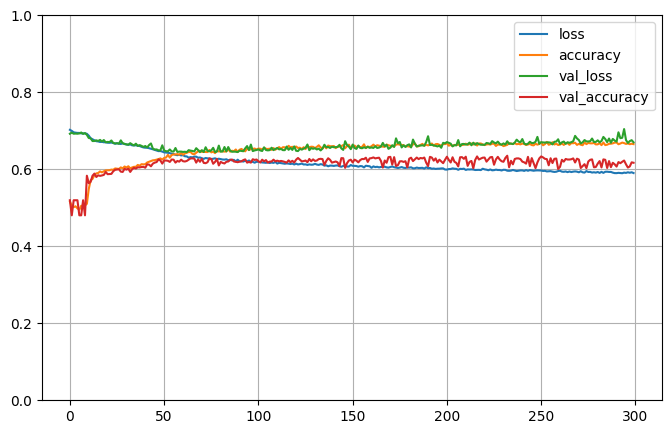


Testing # 2 2
2023-04-29 20:51:10.283462
PREDICT
Test 1:0 1420:1313 51.96%
Predict 1:0 1267:1466 46.36%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.52127224 mean 0.19847155 std
Range of scores: 0.10592415 to 0.961359
Score threshold 0.5
Confusion matrix
 [[866 447]
 [600 820]]
Normalized matrix
 [[0.31686791 0.16355653]
 [0.21953897 0.30003659]]
Extreme scores correct, pos:neg 443 345
Extreme scores incorrect pos:neg 179 179


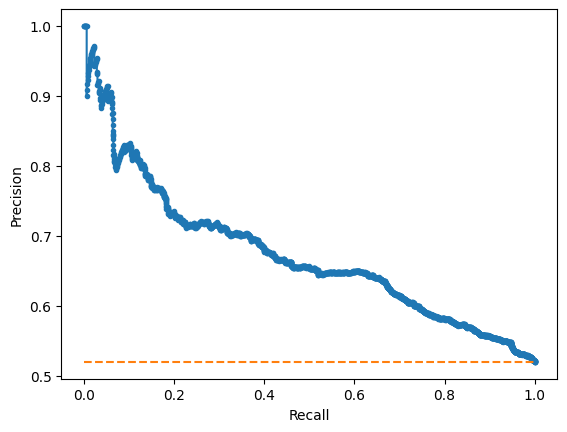

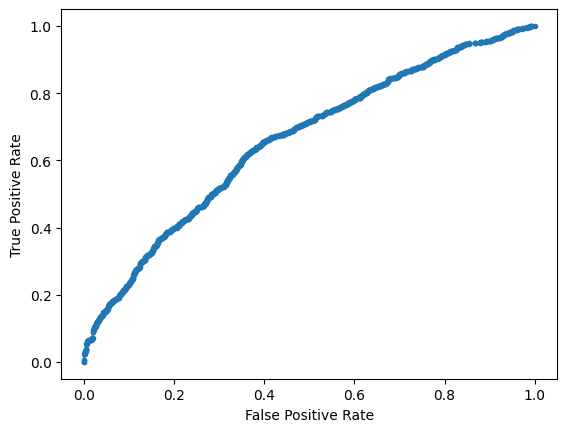

Accuracy: 61.69% Precision: 64.72% Recall: 57.75%
F1: 61.03% MCC: 0.2375
AUPRC: 67.36% AUROC: 65.72%
 accuracy [61.690450054884735]
 precision [64.71981057616418]
 recall [57.74647887323944]
 F1 [61.03461109043543]
 MCC [0.23747168239674338]
 AUPRC [67.35730078635724]
 AUROC [65.71597138045333]

Training # 2 3
2023-04-29 20:51:11.043416
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.3.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5690:5240 52.06%
Computed class weights: {0: 1.04293893129771, 1: 0.960456942003515}
Valid 1:0 1478:1255 54.08%
FIT


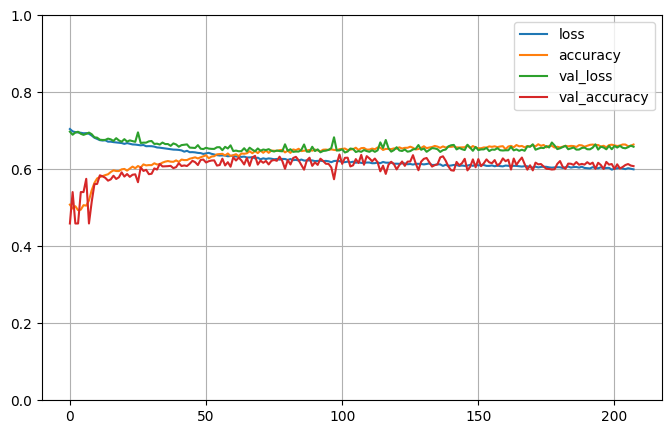


Testing # 2 3
2023-04-29 20:57:35.614999
PREDICT
Test 1:0 1478:1255 54.08%
Predict 1:0 1553:1180 56.82%
Test sizes (2733, 1025) (2733,)
Distrib of scores: 0.54773974 mean 0.18256924 std
Range of scores: 0.13001555 to 0.9888841
Score threshold 0.5
Confusion matrix
 [[ 722  533]
 [ 458 1020]]
Normalized matrix
 [[0.26417856 0.19502378]
 [0.16758141 0.37321625]]
Extreme scores correct, pos:neg 599 301
Extreme scores incorrect pos:neg 233 133


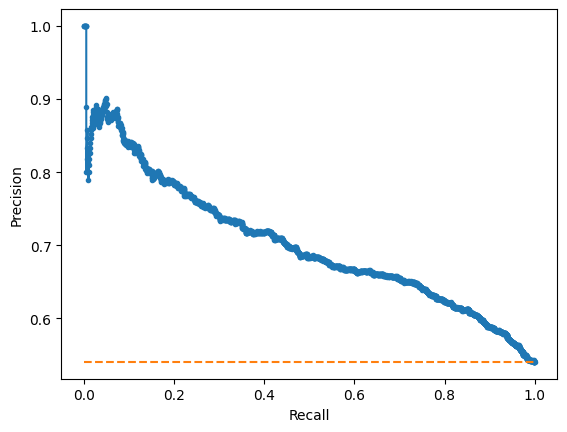

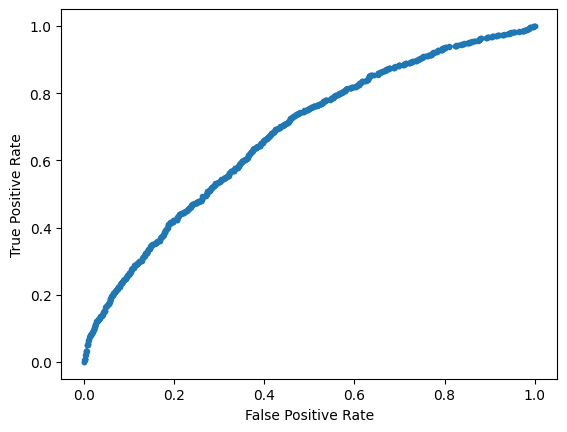

Accuracy: 63.74% Precision: 65.68% Recall: 69.01%
F1: 67.30% MCC: 0.2670
AUPRC: 70.20% AUROC: 67.65%
 accuracy [63.73948042444201]
 precision [65.67933032839666]
 recall [69.01217861975643]
 F1 [67.30451996040911]
 MCC [0.26703424532445763]
 AUPRC [70.19568635794636]
 AUROC [67.64589813951231]

Training # 2 4
2023-04-29 20:57:36.503666
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.4.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5718:5213 52.31%
Computed class weights: {0: 1.048436600805678, 1: 0.9558412032179083}
Valid 1:0 1450:1282 53.07%
FIT


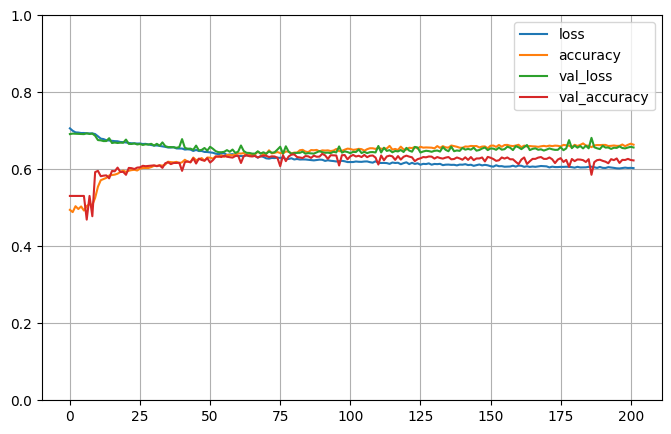


Testing # 2 4
2023-04-29 21:04:00.313963
PREDICT
Test 1:0 1450:1282 53.07%
Predict 1:0 1345:1387 49.23%
Test sizes (2732, 1025) (2732,)
Distrib of scores: 0.49886397 mean 0.18394555 std
Range of scores: 0.051913146 to 0.98447484
Score threshold 0.5
Confusion matrix
 [[839 443]
 [548 902]]
Normalized matrix
 [[0.30710102 0.16215227]
 [0.20058565 0.33016105]]
Extreme scores correct, pos:neg 448 426
Extreme scores incorrect pos:neg 145 220


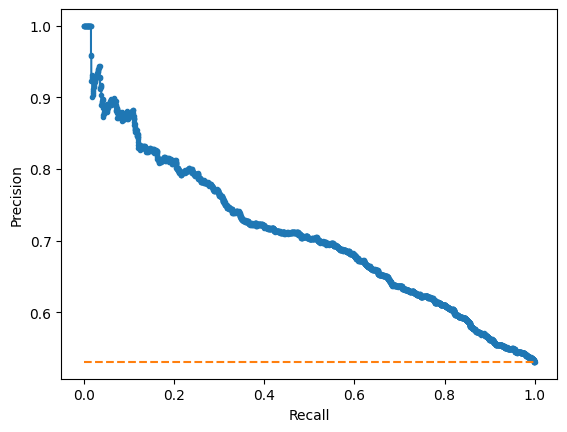

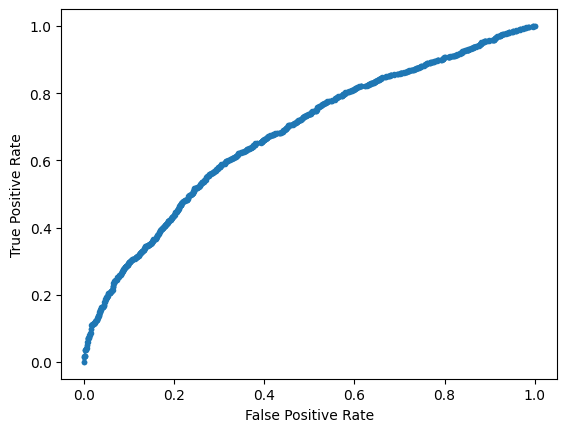

Accuracy: 63.73% Precision: 67.06% Recall: 62.21%
F1: 64.54% MCC: 0.2760
AUPRC: 70.83% AUROC: 67.84%
 accuracy [63.72620790629575]
 precision [67.06319702602231]
 recall [62.206896551724135]
 F1 [64.5438282647585]
 MCC [0.2760244552526108]
 AUPRC [70.82858841163433]
 AUROC [67.84302544515573]

Training # 2 5
2023-04-29 21:04:01.214234
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/pc.2.5.validation_genes.txt
Discriminator ZERO 0
Train 1:0 5777:5154 52.85%
Computed class weights: {0: 1.0604384943733023, 1: 0.9460792799030638}
Valid 1:0 1391:1341 50.92%
FIT


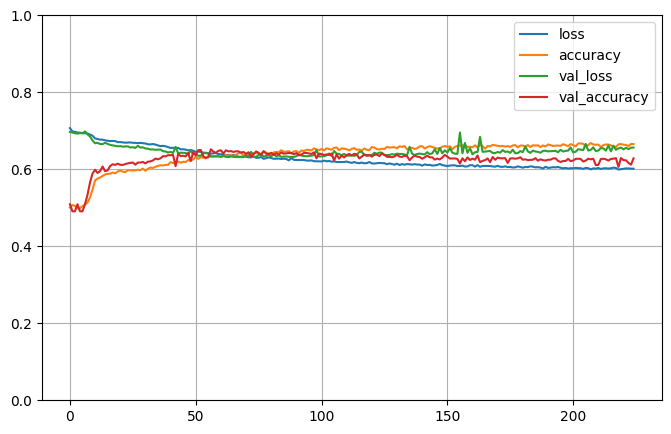


Testing # 2 5
2023-04-29 21:10:23.585743
PREDICT
Test 1:0 1391:1341 50.92%
Predict 1:0 1547:1185 56.63%
Test sizes (2732, 1025) (2732,)
Distrib of scores: 0.5428043 mean 0.20360897 std
Range of scores: 0.11635674 to 0.97474355
Score threshold 0.5
Confusion matrix
 [[773 568]
 [412 979]]
Normalized matrix
 [[0.2829429  0.2079063 ]
 [0.15080527 0.35834553]]
Extreme scores correct, pos:neg 627 419
Extreme scores incorrect pos:neg 267 176


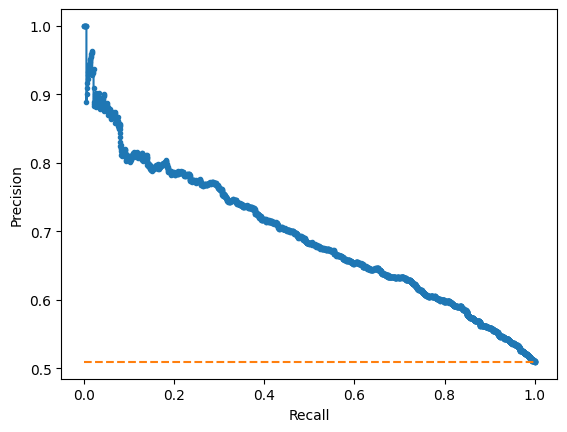

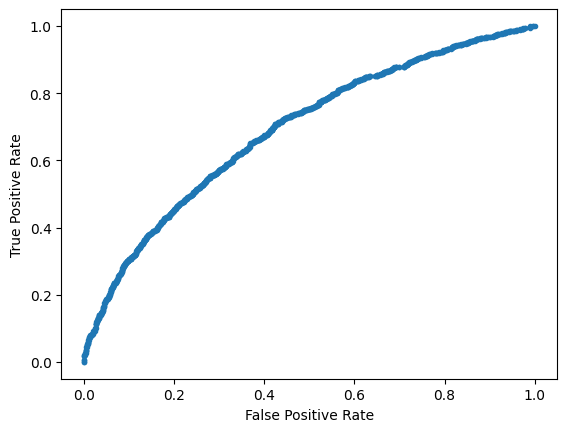

Accuracy: 64.13% Precision: 63.28% Recall: 70.38%
F1: 66.64% MCC: 0.2827
AUPRC: 69.38% AUROC: 69.00%
 accuracy [64.12884333821376]
 precision [63.283775048480926]
 recall [70.38102084831057]
 F1 [66.64397549353302]
 MCC [0.28269139328944115]
 AUPRC [69.38106551230618]
 AUROC [69.00089045858348]
2023-04-29 21:10:24.476640


In [7]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator('pc')  # use pc filename prefix for mRNA
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                model,discrim = cvdo.get_models()
                save_model(model,discrim,filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            if LOAD_MODEL_FILENAME is not None:
                filename1 = LOAD_MODEL_FILENAME
                filename2 = LOAD_DESCRIM_FILENAME
                model, descrim = load_model(filename1, filename2)
                cvdo.set_models(model, descrim)
            else:
                cvdo.train_new_model(
                    train_allids,train_allseq,train_gene_to_rci,
                    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [8]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 63.15% std 0.81
 precision mean 64.64% std 1.69
 recall mean 66.13% std 7.16
 F1 mean 65.13% std 3.20
 MCC mean 0.2612 std 0.0146
 AUPRC mean 69.39% std 1.39
 AUROC mean 67.60% std 0.94
 accuracy [[62.71496523966338], [64.21514818880351], [62.97109403585803], [62.774524158125914], [63.14055636896047], [62.385656787413104], [61.690450054884735], [63.73948042444201], [63.72620790629575], [64.12884333821376]]
 precision [[63.72759856630824], [64.45607911576498], [63.038277511961724], [67.72093023255815], [63.94904458598726], [62.74634456452638], [64.71981057616418], [65.67933032839666], [67.06319702602231], [63.283775048480926]]
 recall [[63.40941512125535], [75.11864406779661], [72.79005524861878], [52.07439198855508], [69.48096885813149], [69.06927921623513], [57.74647887323944], [69.01217861975643], [62.206896551724135], [70.38102084831057]]
 F1 [[63.56810868787988], [69.38008766437069], [67.56410256410257], [58.875859280226436], [66.60033167495854], [65.75616255829448],